## Supervised machine learning: Regression

#### Import data and covert data types

In [46]:
import pandas as pd
import os

In [47]:
# Define path to directory and file name
directory = r"C:\Users\agwsi\CF\6. Advanced Analytics and Dashboard design\Project folder\3. Prepared Data"
filename = "TFS_fire_wrangled.csv"

# Create the full path using os.path.join
path = os.path.join(directory, filename)

# Import data and parse dates directly with dayfirst=True
tfire = pd.read_csv(
    path,
    parse_dates=[
        'date_of_ext_agent_defer', 'date_of_last_TFS_clear', 'date_of_fire_under_control',
        'date_of_TFS_alarm', 'date_of_TFS_arrival'
    ],
    dtype={'cost_dollars': 'int64'},
    index_col=False,  
    dayfirst=True  
)

time_columns = [col for col in tfire.columns if col.startswith('time')]

for col in time_columns:
    tfire[col] = pd.to_datetime(tfire[col], format='%H:%M:%S').dt.time


# enable full view of all columns
pd.set_option('display.max_columns', None)


In [48]:
tfire.head()

,Unnamed: 0,incident_station_area,incident_ward,latitude,longitude,area_of_origin,extent_of_fire,first_material_ignited,ignition_source,possible_cause,alarm_presence,alarm_operation,alarm_failure,alarm_type,alarm_impact_on_evac,date_of_TFS_alarm,time_of_TFS_alarm,date_of_TFS_arrival,time_of_TFS_arrival,date_of_ext_agent_defer,time_of_ext_agent_defer,date_of_fire_under_control,time_of_fire_under_control,date_of_last_TFS_clear,time_of_last_TFS_clear,fire_staus_at_arrival,control_method,business_impact,cost_dollars,persons_displaced,civilian_casualties,persons_rescued,response_time_seconds,response_category,alarm_failure_category,cause_category
0,0,114,18,43.760357,-79.412479,Porch or Balcony,Confined to object of origin,Undetermined (formerly 98),Undetermined,Undetermined,Fire alarm system present,Fire alarm system did not operate,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Not applicable: Occupant(s) first alerted by o...,2018-08-24,16:49:36,2018-08-24,16:54:09,2018-08-24,17:06:26,2018-08-24,17:06:28,2018-08-24,17:42:43,Fire with smoke showing only - including vehic...,Extinguished by fire department,No business interruption,3000,0,0,86,273,Average,n/a (no failure),Undetermined cause
1,1,142,7,43.754542,-79.530419,Cooking Area or Kitchen,Confined to part of room/area of origin,Plastic,"Other Cooking Items (eg Toaster, Kettle, elec ...",Under Investigation,Fire alarm system present,Fire alarm system operated,Not applicable: Alarm operated OR presence/ope...,Interconnected,Not applicable: Occupant(s) first alerted by o...,2018-11-24,07:09:12,2018-11-24,07:14:23,2018-11-24,07:19:00,2018-11-24,07:19:00,2018-11-24,12:45:21,Fire extinguished prior to arrival,Extinguished by occupant,Undetermined,50000,28,0,28,311,Average,n/a (no failure),Investigations
2,2,325,27,43.657300,-79.373460,"Living Area (e.g. living, TV, recreation, etc)","Spread beyond room of origin, same floor",Undetermined (formerly 98),Undetermined,Undetermined,Fire alarm system present,Fire alarm system operated,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Some persons (at risk) evacuated as a result o...,2017-02-09,17:45:07,2017-02-09,17:48:49,2017-02-09,18:02:13,2017-02-09,18:36:21,2017-02-09,23:36:33,Flames showing from small area (one storey or ...,Extinguished by fire department,Not applicable (not a business),1000000,130,1,16,222,Quick,n/a (no failure),Undetermined cause
3,3,332,20,43.649350,-79.393700,Undetermined (formerly 98),Entire Structure,Undetermined (formerly 98),Undetermined,Undetermined,Undetermined,Fire alarm system operation undetermined,Not applicable: Alarm operated OR presence/ope...,Type undetermined,Undetermined,2012-10-30,00:42:01,2012-10-30,00:44:58,2012-10-30,00:52:04,2012-10-30,01:28:48,2012-11-01,16:30:31,Flames showing from large area (more than one ...,Extinguished by fire department,May not resume operations,1000000,14,0,12,177,Quick,n/a (no failure),Undetermined cause
4,4,442,5,43.697960,-79.511539,"Sleeping Area or Bedroom (inc. patients room, ...","Spread beyond room of origin, same floor",Bedding,Matches or Lighters (unable to distinguish),Suspected Arson,Fire alarm system present,Fire alarm system operated,Not applicable: Alarm operated OR presence/ope...,Interconnected,Some persons (at risk) evacuated as a result o...,2018-07-08,04:08:50,2018-07-08,04:13:54,2018-07-08,04:35:00,2018-07-08,04:38:28,2018-07-08,16:44:07,Fire with no evidence from street,Extinguished by fire department,Not applicable (not a business),125000,2,8,11,304,Average,n/a (no failure),Vandalism and Arson


In [49]:
tfire.drop(columns=['Unnamed: 0'], inplace=True)

In [50]:
tfire.head()

,incident_station_area,incident_ward,latitude,longitude,area_of_origin,extent_of_fire,first_material_ignited,ignition_source,possible_cause,alarm_presence,alarm_operation,alarm_failure,alarm_type,alarm_impact_on_evac,date_of_TFS_alarm,time_of_TFS_alarm,date_of_TFS_arrival,time_of_TFS_arrival,date_of_ext_agent_defer,time_of_ext_agent_defer,date_of_fire_under_control,time_of_fire_under_control,date_of_last_TFS_clear,time_of_last_TFS_clear,fire_staus_at_arrival,control_method,business_impact,cost_dollars,persons_displaced,civilian_casualties,persons_rescued,response_time_seconds,response_category,alarm_failure_category,cause_category
0,114,18,43.760357,-79.412479,Porch or Balcony,Confined to object of origin,Undetermined (formerly 98),Undetermined,Undetermined,Fire alarm system present,Fire alarm system did not operate,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Not applicable: Occupant(s) first alerted by o...,2018-08-24,16:49:36,2018-08-24,16:54:09,2018-08-24,17:06:26,2018-08-24,17:06:28,2018-08-24,17:42:43,Fire with smoke showing only - including vehic...,Extinguished by fire department,No business interruption,3000,0,0,86,273,Average,n/a (no failure),Undetermined cause
1,142,7,43.754542,-79.530419,Cooking Area or Kitchen,Confined to part of room/area of origin,Plastic,"Other Cooking Items (eg Toaster, Kettle, elec ...",Under Investigation,Fire alarm system present,Fire alarm system operated,Not applicable: Alarm operated OR presence/ope...,Interconnected,Not applicable: Occupant(s) first alerted by o...,2018-11-24,07:09:12,2018-11-24,07:14:23,2018-11-24,07:19:00,2018-11-24,07:19:00,2018-11-24,12:45:21,Fire extinguished prior to arrival,Extinguished by occupant,Undetermined,50000,28,0,28,311,Average,n/a (no failure),Investigations
2,325,27,43.657300,-79.373460,"Living Area (e.g. living, TV, recreation, etc)","Spread beyond room of origin, same floor",Undetermined (formerly 98),Undetermined,Undetermined,Fire alarm system present,Fire alarm system operated,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Some persons (at risk) evacuated as a result o...,2017-02-09,17:45:07,2017-02-09,17:48:49,2017-02-09,18:02:13,2017-02-09,18:36:21,2017-02-09,23:36:33,Flames showing from small area (one storey or ...,Extinguished by fire department,Not applicable (not a business),1000000,130,1,16,222,Quick,n/a (no failure),Undetermined cause
3,332,20,43.649350,-79.393700,Undetermined (formerly 98),Entire Structure,Undetermined (formerly 98),Undetermined,Undetermined,Undetermined,Fire alarm system operation undetermined,Not applicable: Alarm operated OR presence/ope...,Type undetermined,Undetermined,2012-10-30,00:42:01,2012-10-30,00:44:58,2012-10-30,00:52:04,2012-10-30,01:28:48,2012-11-01,16:30:31,Flames showing from large area (more than one ...,Extinguished by fire department,May not resume operations,1000000,14,0,12,177,Quick,n/a (no failure),Undetermined cause
4,442,5,43.697960,-79.511539,"Sleeping Area or Bedroom (inc. patients room, ...","Spread beyond room of origin, same floor",Bedding,Matches or Lighters (unable to distinguish),Suspected Arson,Fire alarm system present,Fire alarm system operated,Not applicable: Alarm operated OR presence/ope...,Interconnected,Some persons (at risk) evacuated as a result o...,2018-07-08,04:08:50,2018-07-08,04:13:54,2018-07-08,04:35:00,2018-07-08,04:38:28,2018-07-08,16:44:07,Fire with no evidence from street,Extinguished by fire department,Not applicable (not a business),125000,2,8,11,304,Average,n/a (no failure),Vandalism and Arson


#### Import relevant libraries

In [52]:
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#### Investigate potential relationships

### There are a few potential categories I wish to explore visually before stating a hypothesis

In [55]:
# alarm_failure_category counts
alarm_failure_counts = tfire['alarm_failure_category'].value_counts()

<Axes: xlabel='alarm_failure_category'>

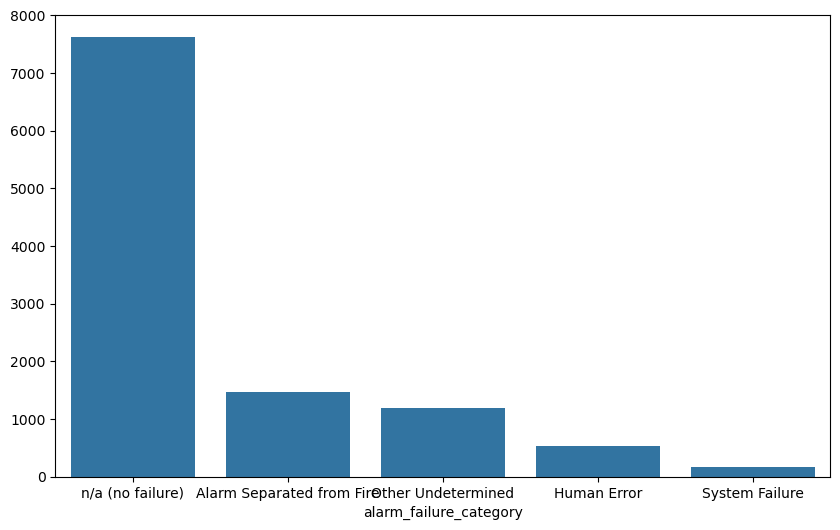

In [56]:
# plotting graph
plt.figure(figsize=(10,6))
sns.barplot(x=alarm_failure_counts.index, y=alarm_failure_counts.values)

#### The above graph includes n/a (no failure) which is clearly not relevant so I shall filter this out

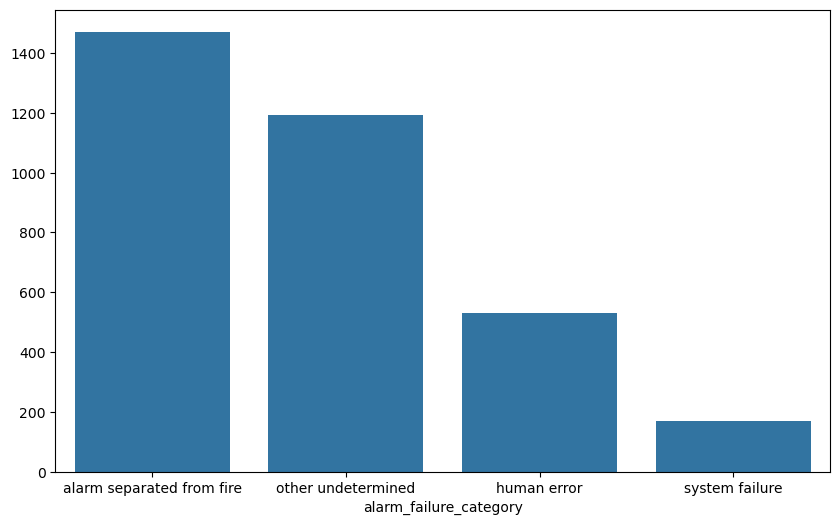

In [58]:
# Previous attempt was unsuccesful so the following code will clean the 'alarm_failure_category' column by stripping whitespace
# and converting to a consistent case and then try again
tfire['alarm_failure_category'] = tfire['alarm_failure_category'].str.strip().str.lower()

# Filter out the 'N/A (No Failure)' category (case insensitive and trimmed)
filtered_tfire = tfire.loc[tfire['alarm_failure_category'] != 'n/a (no failure)']

# Get the value counts for the filtered 'alarm_failure_category'
alarm_failure_counts = filtered_tfire['alarm_failure_category'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=alarm_failure_counts.index, y=alarm_failure_counts.values)

In [59]:
# cause catergory counts
cause_category_counts = tfire['cause_category'].value_counts()

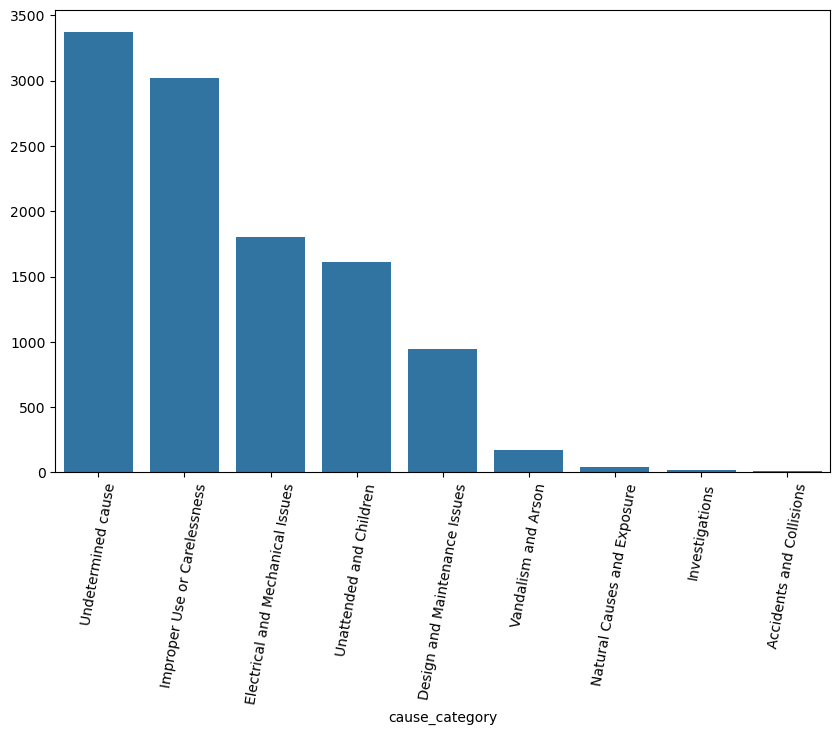

In [60]:
plt.figure(figsize =(10,6))
sns.barplot(x= cause_category_counts.index, y = cause_category_counts.values)

_=plt.xticks(rotation=80)

In [61]:
tfire.columns

Index(['incident_station_area', 'incident_ward', 'latitude', 'longitude',
       'area_of_origin', 'extent_of_fire', 'first_material_ignited',
       'ignition_source', 'possible_cause', 'alarm_presence',
       'alarm_operation', 'alarm_failure', 'alarm_type',
       'alarm_impact_on_evac', 'date_of_TFS_alarm', 'time_of_TFS_alarm',
       'date_of_TFS_arrival', 'time_of_TFS_arrival', 'date_of_ext_agent_defer',
       'time_of_ext_agent_defer', 'date_of_fire_under_control',
       'time_of_fire_under_control', 'date_of_last_TFS_clear',
       'time_of_last_TFS_clear', 'fire_staus_at_arrival', 'control_method',
       'business_impact', 'cost_dollars', 'persons_displaced',
       'civilian_casualties', 'persons_rescued', 'response_time_seconds',
       'response_category', 'alarm_failure_category', 'cause_category'],
      dtype='object')

In [62]:
# first_material_ignited counts
first_material_ignited_counts = tfire['first_material_ignited'].value_counts()

In [63]:
# area of origin counts
area_of_origin_counts = tfire['area_of_origin'].value_counts()

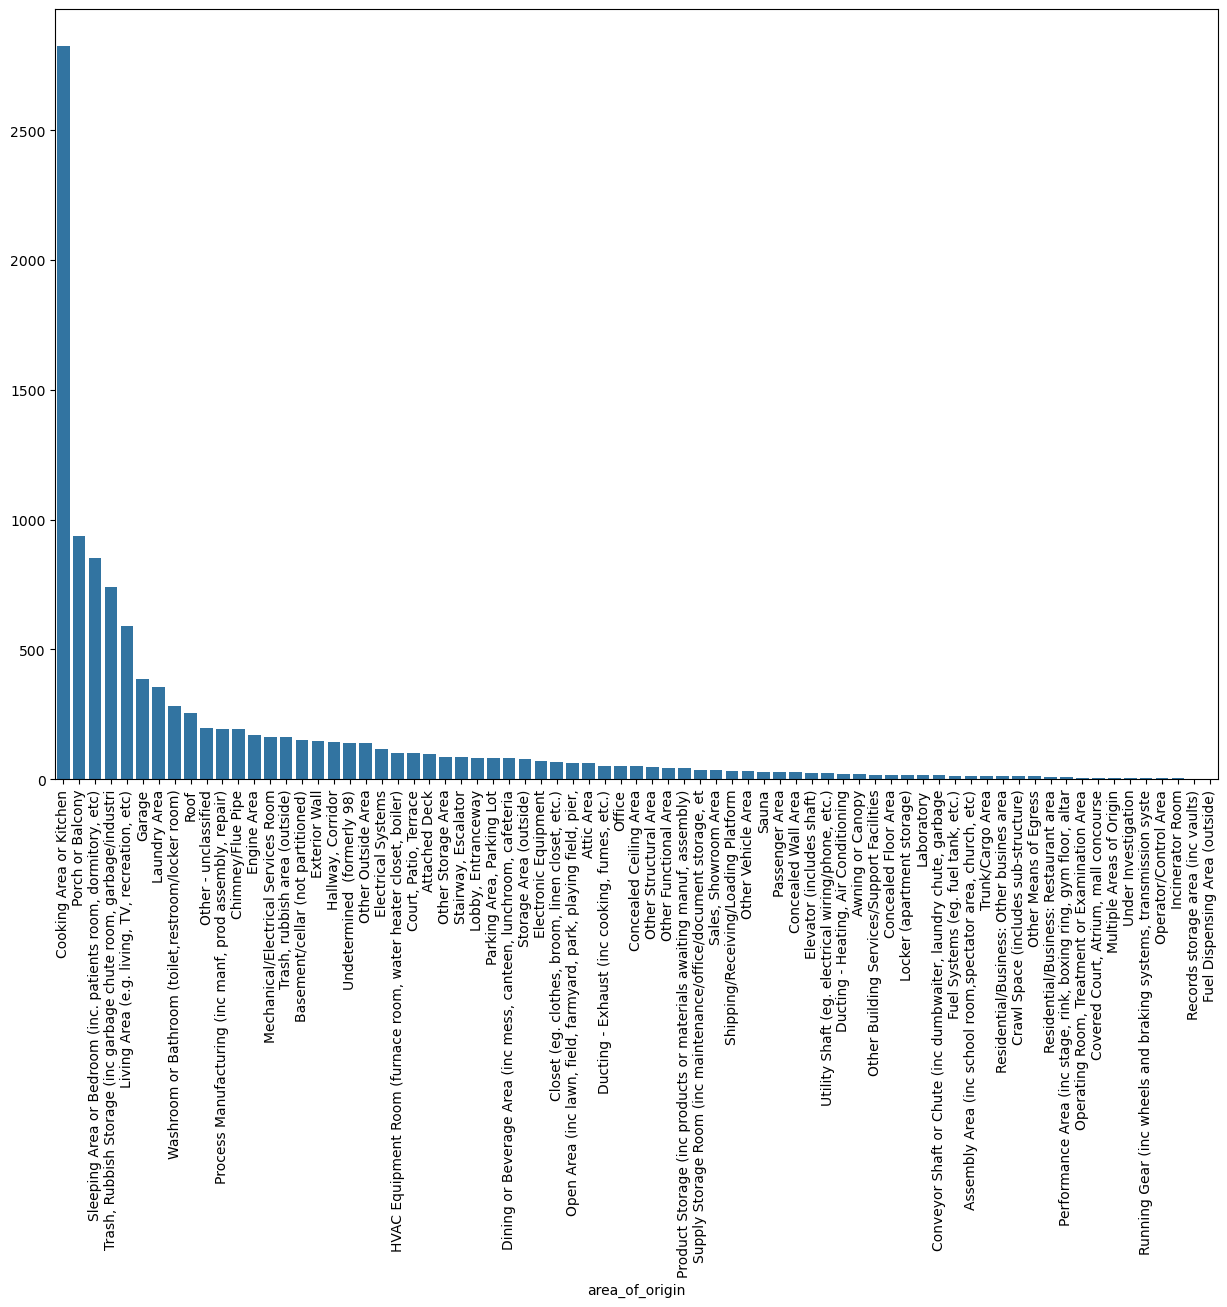

In [64]:
plt.figure(figsize=(15,10))
sns.barplot(x=area_of_origin_counts.index, y=area_of_origin_counts.values)

_=plt.xticks(rotation=90)

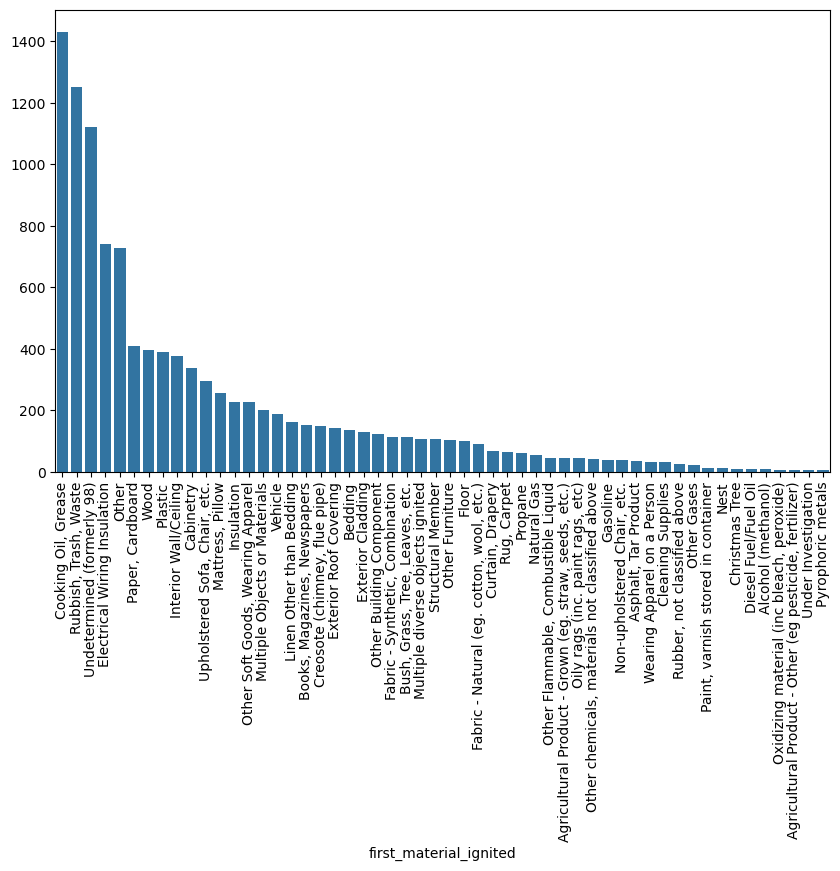

In [65]:
plt.figure(figsize =(10,6))
sns.barplot(x=first_material_ignited_counts.index, y = first_material_ignited_counts.values)

_ =plt.xticks(rotation=90)

In [66]:
# Extract the month and hour from 'date_of_TFS_alarm' and 'time_of_TFS_alarm'
tfire['month'] = tfire['date_of_TFS_alarm'].dt.month
tfire['hour'] = pd.to_datetime(tfire['time_of_TFS_alarm'], format='%H:%M:%S').dt.hour

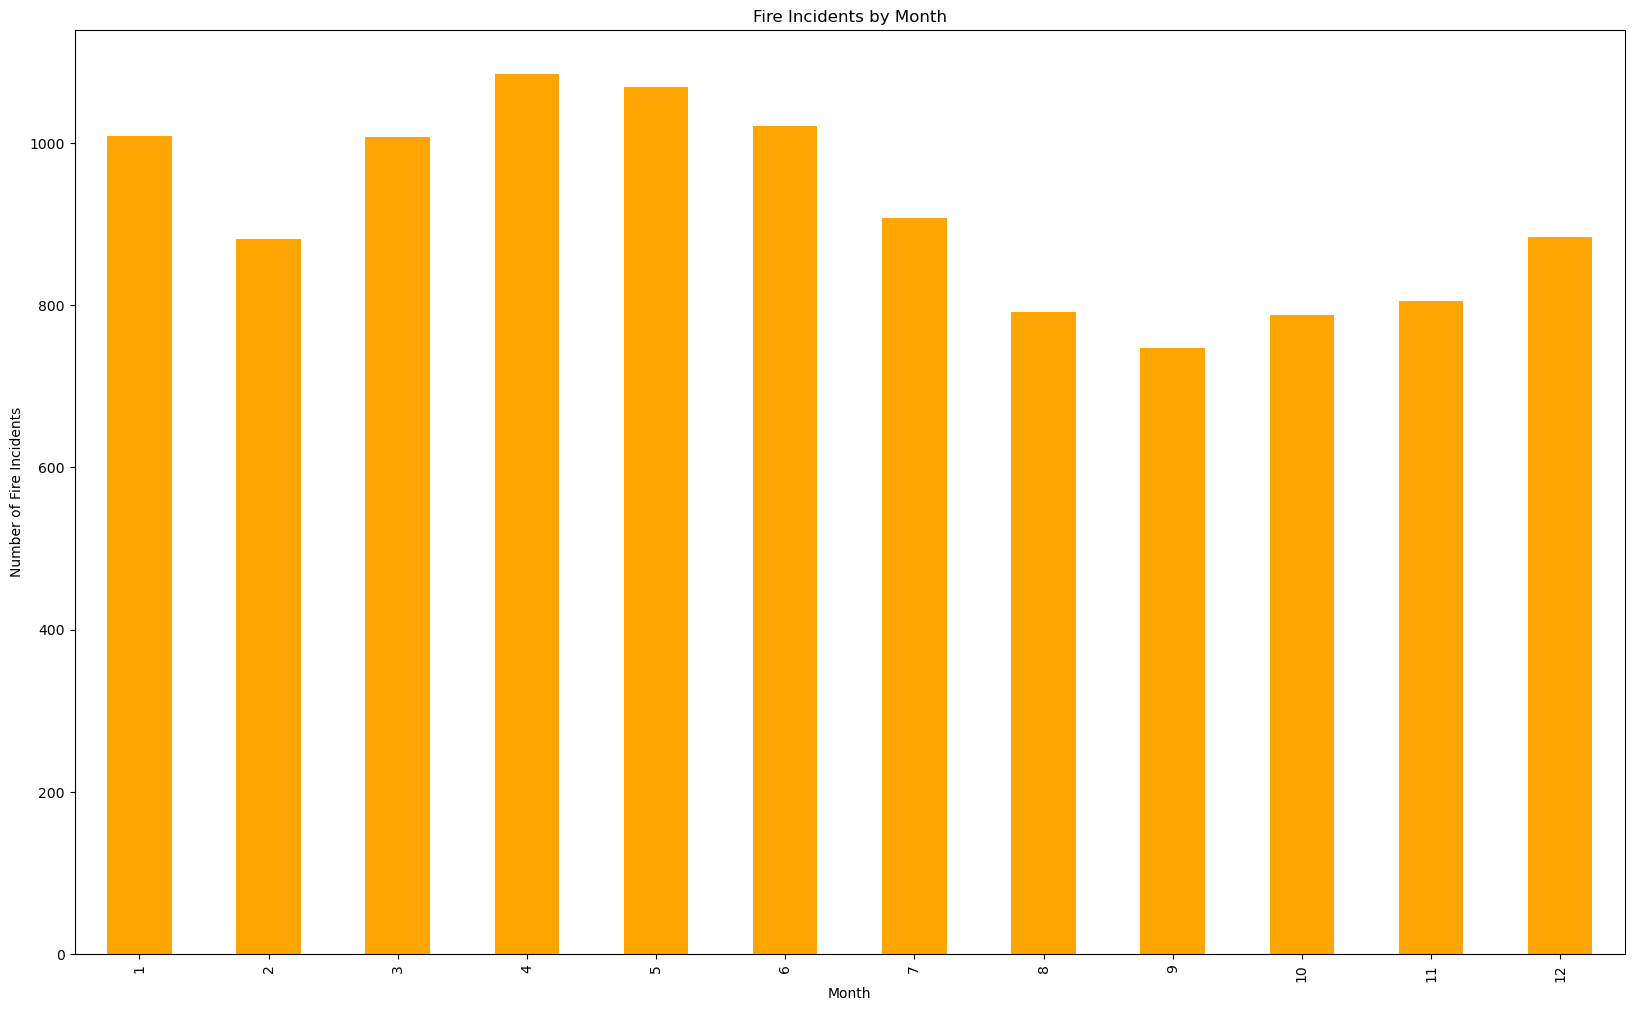

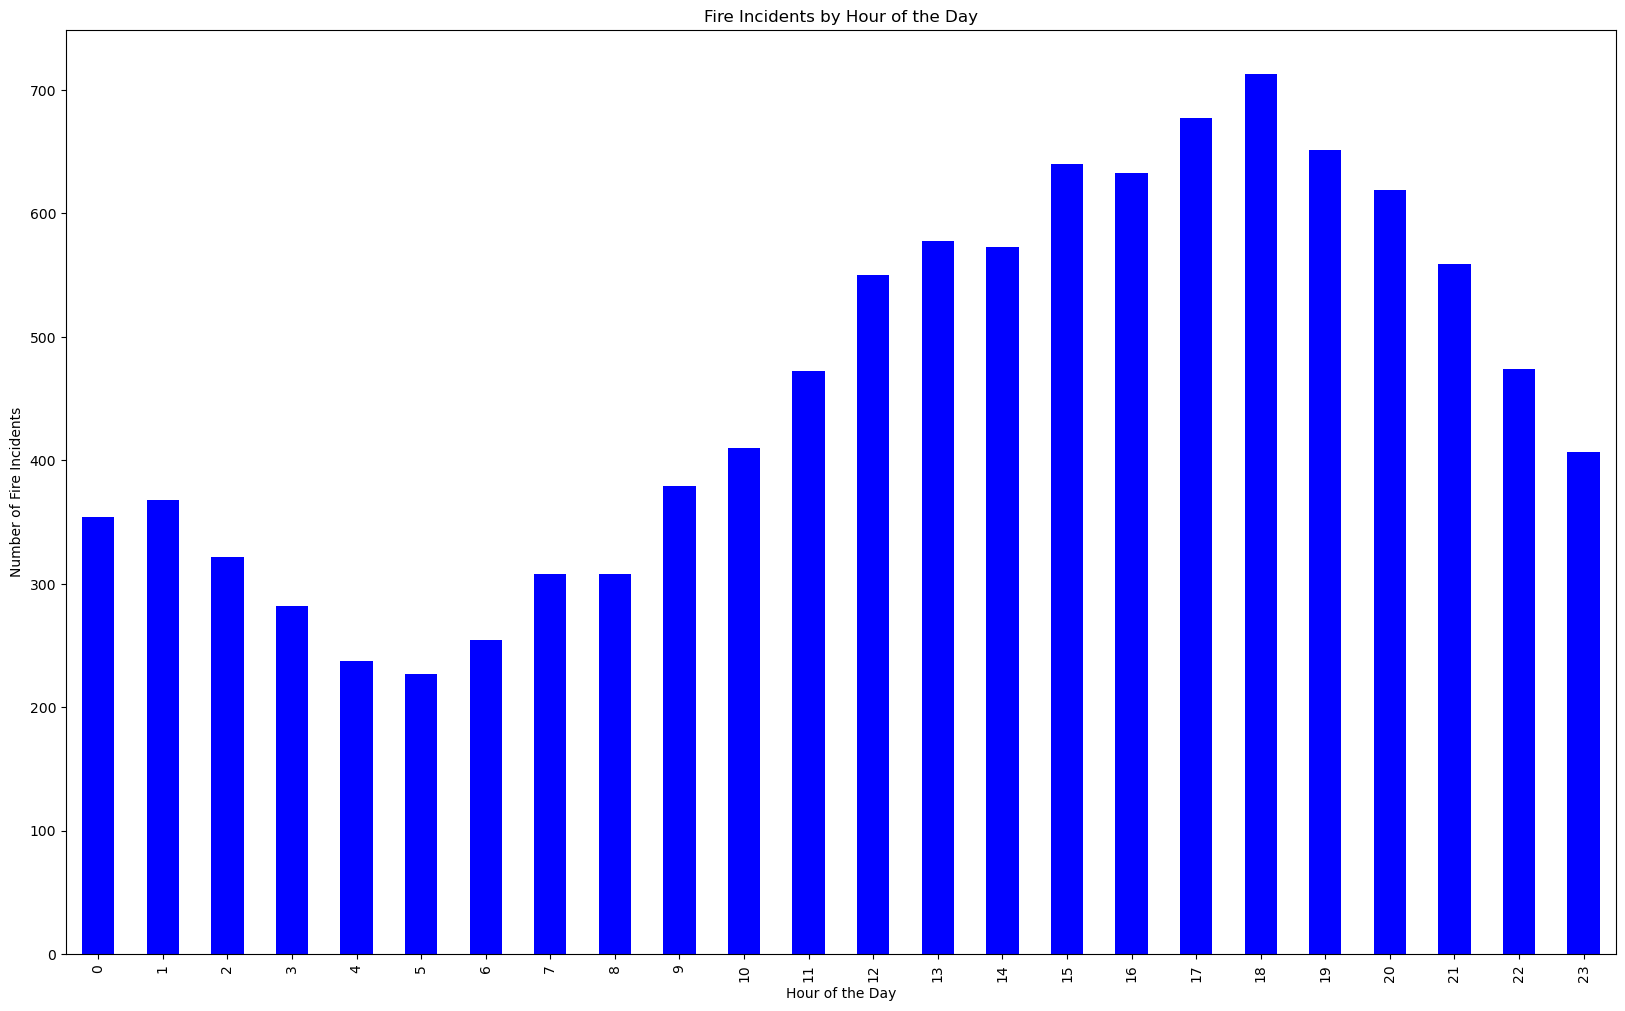

In [67]:
# Analyzing the distribution of fires by month
monthly_fire_counts = tfire['month'].value_counts().sort_index()


# Plotting the distribution of fire incidents by month
monthly_fire_counts.plot(kind='bar', figsize=(20, 12), color='orange', title='Fire Incidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Fire Incidents')
plt.show()

# Analyzing the distribution of fires by hour of the day
hourly_fire_counts = tfire['hour'].value_counts().sort_index()


# Plotting the distribution of fire incidents by hour of the day
hourly_fire_counts.plot(kind='bar', figsize=(20, 12), color='blue', title='Fire Incidents by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Fire Incidents')
plt.show()

## All these above graphs show potential paths for analysis. 
#### The main area of origin by far is the cooking area or kitchen
#### The most likely material first ignited is cooking oil or grease
#### Most probable casue of fire (when known) is improper use or carelessness
#### When the alarm failure is know it is most commonly beacsue of the alarm being located too far from the fire
#### There appears to be a seasonal pattern to both the month and time of day graphs


# Hypothesis: The number of fire incidents in kitchen areas is influenced by specific time windows during the day, showing higher incidents during typical meal preparation times (morning, noon, and evening).

#### Create new column based on traditional meal times in Canada

In [71]:
# Convert the 'time_of_TFS_alarm' column to a datetime object to extract the hour
tfire['time_of_TFS_alarm'] = pd.to_datetime(tfire['time_of_TFS_alarm'], format='%H:%M:%S')

# Extract the hour from column
tfire['hour'] = tfire['time_of_TFS_alarm'].dt.hour

In [72]:
tfire.dtypes

incident_station_area                  int64
incident_ward                          int64
latitude                             float64
longitude                            float64
area_of_origin                        object
extent_of_fire                        object
first_material_ignited                object
ignition_source                       object
possible_cause                        object
alarm_presence                        object
alarm_operation                       object
alarm_failure                         object
alarm_type                            object
alarm_impact_on_evac                  object
date_of_TFS_alarm             datetime64[ns]
time_of_TFS_alarm             datetime64[ns]
date_of_TFS_arrival           datetime64[ns]
time_of_TFS_arrival                   object
date_of_ext_agent_defer       datetime64[ns]
time_of_ext_agent_defer               object
date_of_fire_under_control    datetime64[ns]
time_of_fire_under_control            object
date_of_la

In [73]:
# create 'Other' category to indicate non-meal times
tfire['meal_time'] = 'Other' 

# Breakfast
tfire.loc[(tfire['hour'] >= 5) & (tfire['hour'] <=9), 'meal_time'] = 'Breakfast'
# Lunch
tfire.loc[(tfire['hour'] >= 11) & (tfire['hour'] <=13), 'meal_time'] = 'Lunch'
# Dinner
tfire.loc[(tfire['hour'] >= 17) & (tfire['hour'] <= 20), 'meal_time'] = 'Dinner'

In [74]:
tfire['meal_time'].value_counts()

meal_time
Other        5259
Dinner       2660
Lunch        1600
Breakfast    1476
Name: count, dtype: int64

In [75]:
# Group by area_of_origin and hour
grouped_data = tfire.groupby(['area_of_origin', 'hour']).size().reset_index(name='incident_count')

# Join the grouped data back to the original DataFrame
tfire = pd.merge(tfire, grouped_data, on=['area_of_origin', 'hour'], how='left')

In [76]:
# Filter for kitchen fires
kitchen_fires = tfire[tfire['area_of_origin'] == 'Cooking Area or Kitchen']

# Create dependent variable 
y = kitchen_fires['incident_count']
X = kitchen_fires[['hour']]  

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit linear regression model
regression = LinearRegression()
regression.fit(X_train, y_train)

# Make predictions on the test set
y_predicted = regression.predict(X_test)

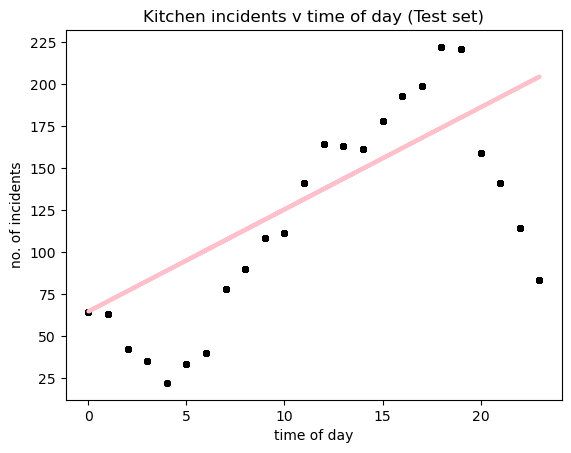

In [77]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='black', s = 15)
plot_test.plot(X_test, y_predicted, color='pink', linewidth =3)
plot_test.title('Kitchen incidents v time of day (Test set)')
plot_test.xlabel('time of day')
plot_test.ylabel('no. of incidents')
plot_test.show()

#### The line does not seem to fit very well. The pattern of the points seems to show more of a cyclical trend

In [79]:
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score (y_test, y_predicted)

print('slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

slope: [6.07407663]
Mean squared error:  1696.2913708519318
R2 score:  0.41603543203896187


In [80]:
data = pd.DataFrame({'Actual': y_test.values.ravel(),'Predicted': y_predicted})

In [81]:
data.head(30)

,Actual,Predicted
0,33,94.928038
1,163,143.520651
2,78,107.076191
3,178,155.668804
4,141,192.113264
5,114,198.187341
6,222,173.891034
7,222,173.891034
8,221,179.965111
9,178,155.668804


### Based on the results it´s clear to see that studying the data to see if there is a cyclical trend would be better as the low r2 score suggest that there is not a stong linear correlation

In [83]:
# export with new columns
tfire.to_csv(r"C:\Users\agwsi\CF\6. Advanced Analytics and Dashboard design\Project folder\3. Prepared Data\fire_incidents_hour_column_after_64.csv")

In [ ]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Create a polynomial features object with degree 3
poly_features = PolynomialFeatures(degree=3)

# Create a pipeline with polynomial features and linear regression
model = Pipeline([
    ('poly_features', poly_features),
    ('linear_regression', LinearRegression())
])

# Fit the model to your data
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.scatter(X, y, color='blue')

# Set labels and title
plt.xlabel("Hour")
plt.ylabel("Number of Fire Incidents")
plt.title("Relationship between Hour and Number of Fire Incidents")

# Show the plot
plt.show()

Mean Squared Error: 3628.3006476286905
R2 Score: 0.11805439202130374


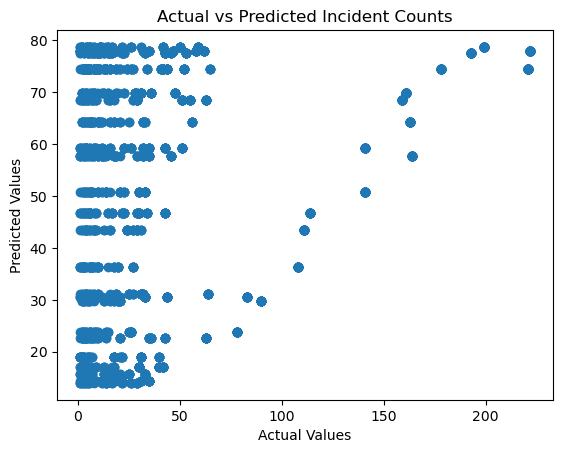

In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'hour' column exists in tfire DataFrame

# Step 1: Create squared and cubic terms for 'hour'
tfire['hour_2'] = tfire['hour']**2
tfire['hour_3'] = tfire['hour']**3

# Step 2: Define independent and dependent variables
# Using 'hour', 'hour_2', and 'hour_3' as independent variables
X = tfire[['hour', 'hour_2', 'hour_3']]
y = tfire['incident_count']  # Dependent variable

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Initialize and fit the linear regression model
regression = LinearRegression()
regression.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = regression.predict(X_test)

# Step 6: Calculate MSE and R2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 7: Print model performance statistics
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

# Optionally, visualize the predicted vs actual values
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Incident Counts')
plt.show()
